## ML Classification With Structured Data - Template

* <ins>Author</ins>: Duncan Calvert
* <ins>Last Modified</ins>: 9/24/24

This article is part of my series Watch One, Do One, Teach One (WDT), A data science series focused around helping beginner data scientist learn AI concepts, practice implementing them, and then teach the concept to others in order to cement their understanding. 

This specific template is meant to be used for ML classification with structured data sets. It has the following sections

## Table of Contents
1. [Library Imports](#1-package-imports-and-installs)
2. [Configurations](#2-configurations)
3. [Downloading the Data Set](#3-downloading-the-data-set)
4. [Exploratory Data Analysis](#exploratory-data-analysis-eda)
    - [4a. Pandas EDA](#4a-pandas-eda)
    - [4b. Check for Target Leakage](#4b-check-for-target-leakage)
    - [4c. AutoViz](#4c-autoviz)
5. [Data Cleaning](#5-data-cleaning)
6. [Feature Engineering](#6-feature-engineering)
7. [AutoML](#7-automl)
8. [Iterative Modeling and Hyperparameter Tuning](#8-iterative-modeling-and-hyperparameter-tuning)
9. [Explainability](#9-explainability)
    - [9a. Feature importance](#9a-feature-importance)
10. [Summary and Lessons Learned](#10-summary-and-lessons-learned)

## 1. Package Imports and Installs

In [2]:
# !pip install -r requirements.txt

In [37]:
# Data Imports
from palmerpenguins import load_penguins

# General packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# AutoEDA Tools
from autoviz import AutoViz_Class

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Feature Importance/Explainability:
# import eli5
# from eli5.sklearn import PermutationImportance

## 2. Configurations

In [51]:
# sets the max column count, allowing us to control truncation and visibility
pd.set_option('display.max_columns', None) 

# allows the dataframe to stretch across multiple pages
pd.set_option('display.expand_frame_repr', False) 

# sets the maximum width of columns, allowing us to control visibility
pd.set_option('max_colwidth', None) 

# display numbers to a higher precision
pd.options.display.float_format = '{:,.7}'.format 

%matplotlib inline


## 3. Downloading the Data Set

#### Loading a toy data set

In [5]:
# Load the toy pandas data set from the palmerpenguins package
# df = load_penguins()

#### Loading a CSV

In [6]:
df = pd.read_csv('/Users/attis/Desktop/Autism-prediction/train.csv')

#### Loading an Excel

In [7]:
# df = pandas.read_excel('<Insert Excel File Name>.xlsx',sheet_name = '<Insert tab name>')

#### Load a JSON

In [8]:
"""
file_path = "/home/jupyter/data/news/news_some_company.json"
df = pd.read_json(file_path, orient='records', lines=True)
df.head()
"""

'\nfile_path = "/home/jupyter/data/news/news_some_company.json"\ndf = pd.read_json(file_path, orient=\'records\', lines=True)\ndf.head()\n'

#### Loading a Google Drive File

In [9]:
"""
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
"""

"\nfrom google.colab import drive\n\n# Mount Google Drive\ndrive.mount('/content/drive')\n"

#### Copy files to local FS from GCS

In [10]:
"""
# GCS download function
def get_gcs_data(bucket_name, folder_name, file_name, path_local):
    url = 'https://storage.googleapis.com/' + bucket_name + '/' + folder_name + '/' + file_name
    r = requests.get(url)
    open(path_local + '/' + file_name , 'wb').write(r.content)

# Receiving path
path_news = '/home/jupyter/data/news'
os.makedirs(path_news, exist_ok=True)
    
# GCS bucket details
bucket_name = 'msca-bdp-data-open'
folder_name = 'news'
file_name = ['news_some_company.json']
path_local = path_news

os.makedirs(path_local, exist_ok=True)

for file in file_name:
    get_gcs_data (bucket_name = bucket_name,
                 folder_name = folder_name,
                 file_name = file,
                 path_local = path_local)
    print('Downloaded: ' + file)
"""

"\n# GCS download function\ndef get_gcs_data(bucket_name, folder_name, file_name, path_local):\n    url = 'https://storage.googleapis.com/' + bucket_name + '/' + folder_name + '/' + file_name\n    r = requests.get(url)\n    open(path_local + '/' + file_name , 'wb').write(r.content)\n\n# Receiving path\npath_news = '/home/jupyter/data/news'\nos.makedirs(path_news, exist_ok=True)\n    \n# GCS bucket details\nbucket_name = 'msca-bdp-data-open'\nfolder_name = 'news'\nfile_name = ['news_some_company.json']\npath_local = path_news\n\nos.makedirs(path_local, exist_ok=True)\n\nfor file in file_name:\n    get_gcs_data (bucket_name = bucket_name,\n                 folder_name = folder_name,\n                 file_name = file,\n                 path_local = path_local)\n    print('Downloaded: ' + file)\n"

## Exploratory Data Analysis (EDA)

EDA is one of the most important parts of any data science workflow as understanding the nuances of your data, identifying potential biases, missing data, or issues with your data set is extremely important for all subsequent steps. 

* <ins>Note</ins>: Even before EDA, whenever possible, you should attempt to discuss any potential data quality, availability, or bias issue with any data subject matter experts that are available. This is important as there are often nuances and potential pitfalls in the way data is collected and cataloged that may not be apparent from code-based EDA.

### 4a. Pandas EDA

#### Shape
The "shape" attribute gives the axis dimensions of the object, consistent with ndarray allowing us to quickly guage the size of our data set

In [11]:
df.shape

(800, 22)

#### Head/Tail
The "head" and "tail" methods allow us to view a small sample of a Series or DataFrame object with the default length being 5. You can pass a parameter to the methods to increase/decrease their row count. These methods allow us to quickly get a sense of the columns/features available and what a few examples of the data set look like.

In [12]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,1,18.6054,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,1,13.82937,f,South Asian,no,no,Australia,no,10.5443,18 and more,?,0


In [13]:
df.tail(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
798,799,1,1,1,1,1,1,0,1,1,1,19.24147,f,Middle Eastern,no,yes,United States,no,3.682732,18 and more,Relative,0
799,800,1,0,0,1,1,0,0,1,1,1,32.1701,f,Asian,no,no,New Zealand,no,12.06017,18 and more,Self,0


#### Info
The "info" method provides us with column level info on our dataframe, specifically data types, null count, and indexes

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

#### Describe
The "describe" method provides common summary statistics of your dataframes features. It is primarily used with numeric data sets

In [15]:
df.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
mean,400.5,0.5825,0.28625,0.32125,0.415,0.4575,0.20875,0.27375,0.7175,0.31625,0.46,28.61231,7.05853,0.23125
std,231.0844,0.4934553,0.4522904,0.4672487,0.4930303,0.4985021,0.4066696,0.4461611,0.4504969,0.4653027,0.4987092,12.87237,3.788969,0.4218956
min,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.560505,-2.594654,0.0
25%,200.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.28208,4.527556,0.0
50%,400.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25.47996,6.893472,0.0
75%,600.25,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,33.15476,9.892981,0.0
max,800.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,72.40249,13.39087,1.0


#### Value Counts For All Categorical Columns

In [16]:
# iterate through the categorical features and return values
for feature in df.columns:
    if df[feature].dtype != 'int64':
        print(df[feature].value_counts())

age
16.69477    1
17.89826    1
32.16281    1
18.00918    1
22.42243    1
           ..
14.25669    1
61.03529    1
14.67989    1
13.82937    1
18.6054     1
Name: count, Length: 800, dtype: int64
gender
f    415
m    385
Name: count, dtype: int64
ethnicity
White-European     211
?                  151
Asian              134
Middle Eastern     116
Black               45
Latino              44
South Asian         35
Others              24
Pasifika            18
Hispanic            16
Turkish              4
others               2
Name: count, dtype: int64
jaundice
no     604
yes    196
Name: count, dtype: int64
austim
no     683
yes    117
Name: count, dtype: int64
contry_of_res
United States           148
United Arab Emirates     94
New Zealand              93
India                    74
United Kingdom           58
Australia                43
Jordan                   40
Afghanistan              23
Sri Lanka                16
Canada                   15
Netherlands              14
Austri

#### Feature Type Splitting

Create 3 lists that split our features by their type to allow for EDA

In [24]:
ints = []
objects = []
floats = []

for col in df.columns:
  if df[col].dtype == int:
    ints.append(col)
  elif df[col].dtype == object:
    objects.append(col)
  else:
    floats.append(col)
    
print(ints)

['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Class/ASD']


#### Review Numeric/Int Features

In [34]:
ints.remove('ID')
ints.remove('Class/ASD')

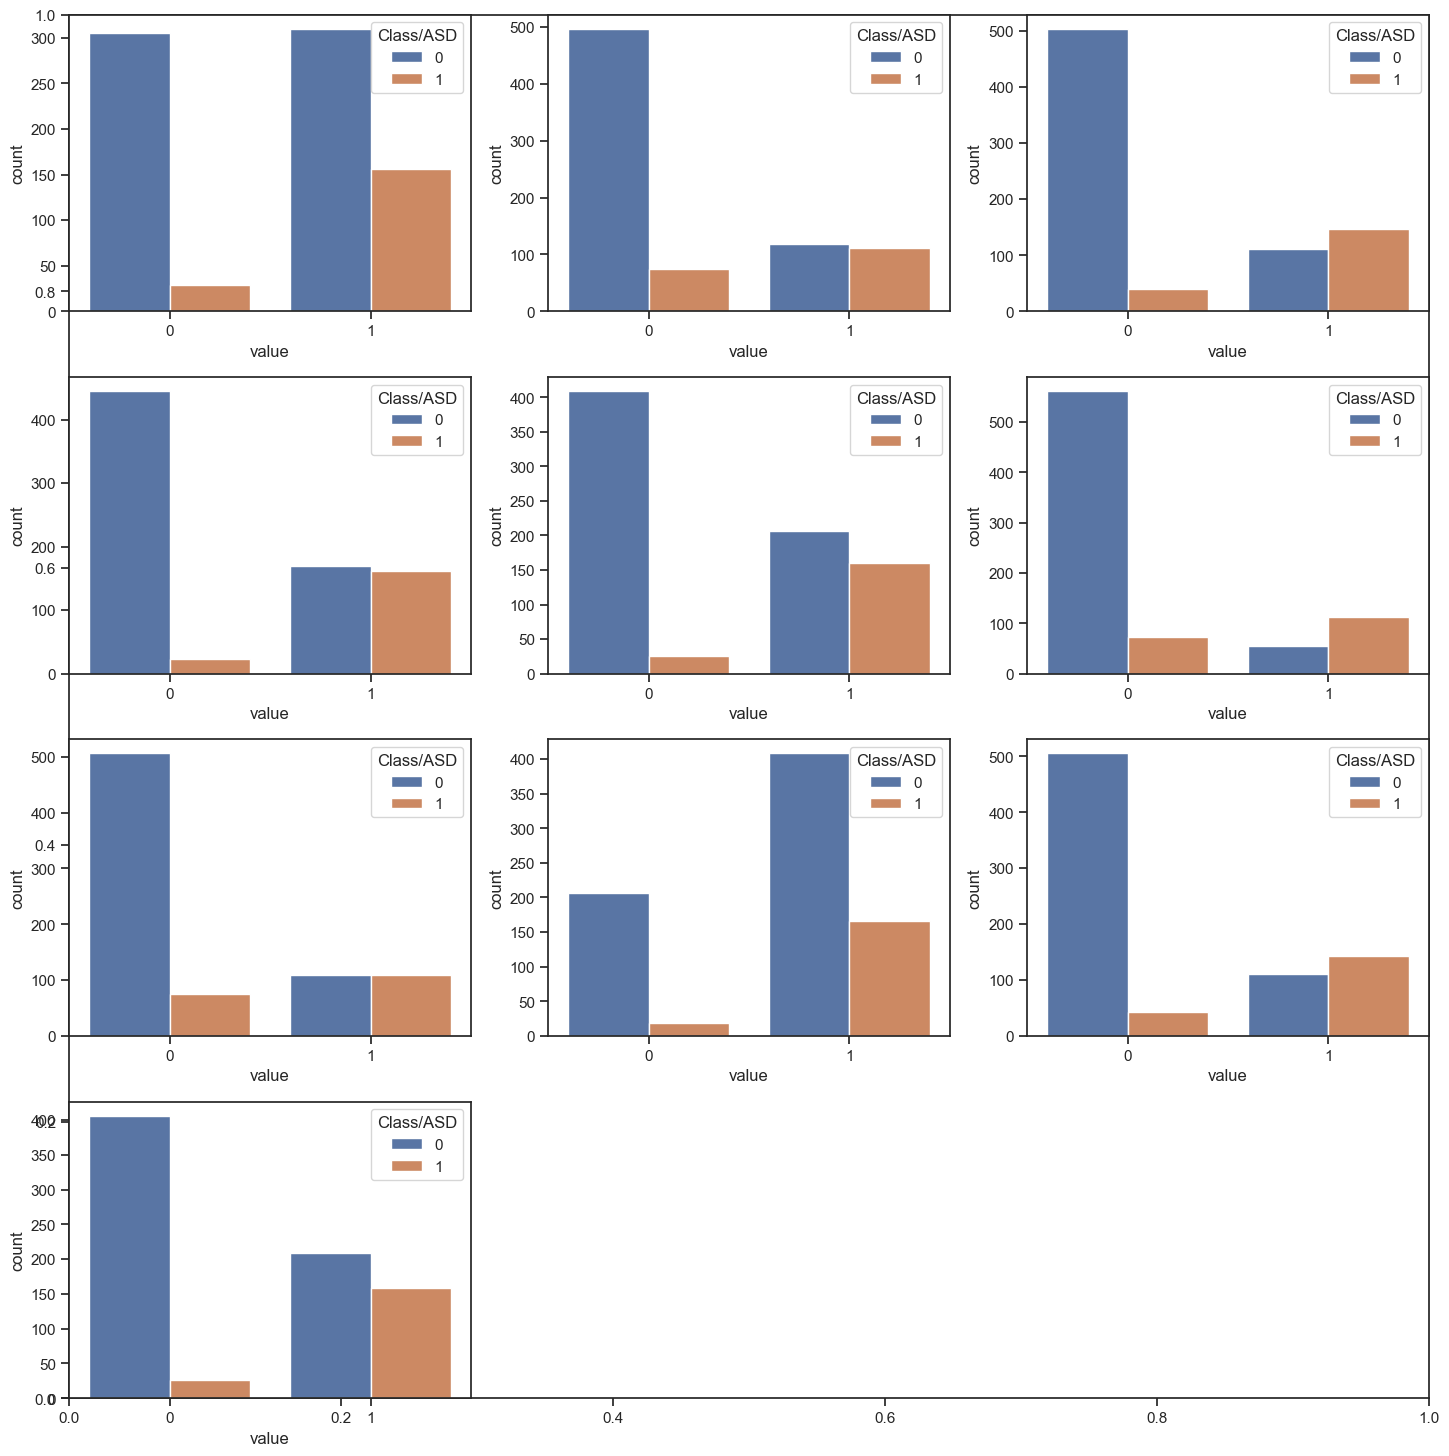

In [57]:

# Convert the data to long-form using melt
df_melted = df.melt(id_vars=['ID', 'Class/ASD'], value_vars=ints, var_name='col', value_name='value')


plt.subplots(figsize=(15,15))

for i, col in enumerate(ints):
  plt.subplot(4,3,i+1)
  # Use the melted DataFrame and specify x and hue
  sns.countplot(x="value", hue='Class/ASD', data=df_melted[df_melted['col'] == col]) 

plt.tight_layout()
plt.show()



#### Review Categorical Features

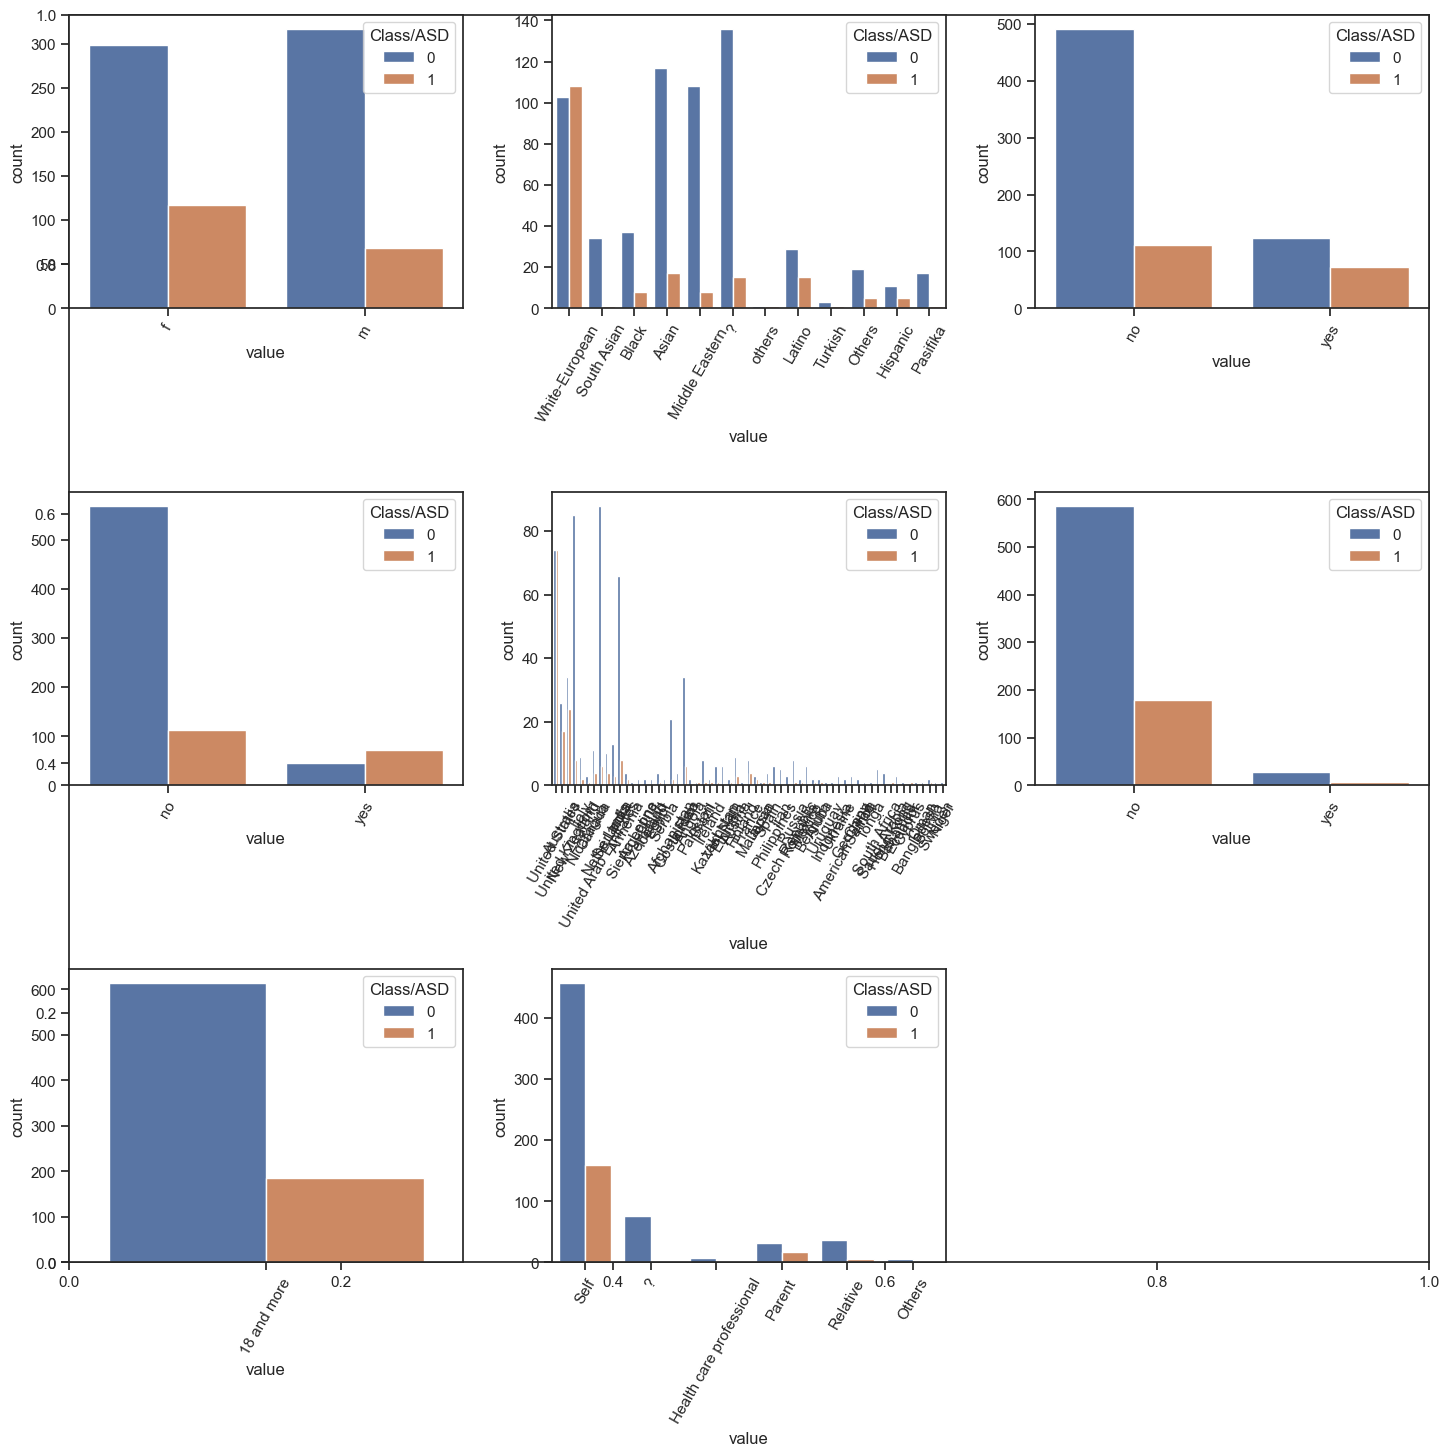

In [48]:
plt.subplots(figsize=(15, 15))

for i, col in enumerate(objects):
    plt.subplot(3, 3, i+1)
    # Convert the data to long-form for the specific column
    df_melted = df.melt(id_vars=['Class/ASD'], value_vars=[col], var_name='col', value_name='value')
    
    # Use the melted DataFrame and specify x and hue
    sns.countplot(x="value", hue='Class/ASD', data=df_melted)
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

### 4b. Check for Target Leakage

### 4c. AutoViz

AutoViz is an automated vizualisation package that gives a quick interactive overview of your data

In [17]:
"""
AV = AutoViz_Class()
%matplotlib inline 

# Run AutoViz on the dataframe
dft = AV.AutoViz(
    "",
    sep=",",
    depVar="",
    dfte=df,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)

"""

'\nAV = AutoViz_Class()\n%matplotlib inline \n\n# Run AutoViz on the dataframe\ndft = AV.AutoViz(\n    "",\n    sep=",",\n    depVar="",\n    dfte=df,\n    header=0,\n    verbose=1,\n    lowess=False,\n    chart_format="svg",\n    max_rows_analyzed=150000,\n    max_cols_analyzed=30,\n    save_plot_dir=None\n)\n\n'

## 5. Data Cleaning

#### Renaming Columns

In [ ]:
train.rename(columns = {'Class/ASD':'ASD'}, inplace = True)
test.rename(columns = {'Class/ASD':'ASD'}, inplace = True)

### 5a. Train/Test Split

In [18]:
"""

base_features = ['<insert list of feature names>']

X = df[base_features]

y = df."<insert column name>"


train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

"""

'\n\nbase_features = [\'<insert list of feature names>\']\n\nX = df[base_features]\n\ny = df."<insert column name>"\n\n\ntrain_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)\n\n'

## 6. Feature Engineering/Selection

* Differencing

## 7. AutoML

## 8. Iterative Modeling and Hyperparameter Tuning

In [19]:
data = pd.read_csv('../input/fifa-2018-match-statistics/FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(train_X, train_y)

FileNotFoundError: [Errno 2] No such file or directory: '../input/fifa-2018-match-statistics/FIFA 2018 Statistics.csv'

## 9. Explainability

### 9a. Feature importance

<ins>[Permutation importance](https://scikit-learn.org/dev/modules/permutation_importance.html)</ins>: Permutation importance is calculated after a model has been fitted, and involves randomly shuffling a single column of the data set, leaving the target and all other features in place. Then you measure how that affects the accuracy of predictions in that now-shuffled data. The benefits of permutation importance is that it is generally fast to calculate, widely used, and easy to understand. 
* Shuffling a single feature/column at random should lead to less accurate predictions, since the resulting data set no longer corresponds to anything observed in the real world. Model accuracy especially suffers if we shuffle a column that the model relied on heavily for predictions.
* Pro tip: The scale of features does not affect permutation importance per se. The only reason that rescaling a feature could affect PI is indirectly, if rescaling helped or hurt the ability of the particular model you are using to make use of that feature.


The high-level process is as follows
1. Get a trained model.
2. Shuffle the values in a single column, make predictions using the resulting dataset. Use these predictions and the true target values to calculate how much the loss function suffered from shuffling. That performance deterioration measures the importance of the variable you just shuffled.
3. Return the data to the original order (undoing the shuffle from step 2). Now repeat step 2 with the next column in the dataset, until you have calculated the importance of each column.
4. Interpret your results
    * The values towards the top (i.e. the bigger ones) are the most important featues
    * The first column shows how much model performance increased/decreased with a random shuffle
    * The second column measures the amount of randomness by repeating the process with multiple shuffles. The number after the +- measures performance varied from one-reshuffling to the next
    * In the case of negative values, the predictions on the shuffled/noisy data happened to be more accurate than the real data. This happens when the feature didn't matter (should have had an importance close to 0), but random chance caused the predictions on shuffled data to be more accurate. This is more common with small datasets, like the one in this example, because there is more room for luck/chance.

**[ELI5 Library](https://pypi.org/project/eli5/)**

The below implementation uses the ELI5 library. ELI5 is a Python package which helps users to explain and debug ML classifiers. It can be used with many of the common machine learning frameworks (sklearn, Keras, xgboost, LightGBM, etc.)


In [ ]:
perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

### 9b. Partial Dependence Plots

## 10. Summary and Lessons Learned